In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### 1. Типы данных дата/время

In [2]:
from datetime import datetime
now = datetime.now()
display(now)
now.year, now.month, now.day

datetime.datetime(2019, 12, 13, 12, 35, 53, 523615)

(2019, 12, 13)

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8,15)
display(delta)
display(delta.days)
display(delta.seconds)

datetime.timedelta(days=926, seconds=56700)

926

56700

In [4]:
from datetime import timedelta
start = datetime(2011, 1, 7)
display(start + timedelta(12))
display(start - 2 * timedelta(12))

datetime.datetime(2011, 1, 19, 0, 0)

datetime.datetime(2010, 12, 14, 0, 0)

### 2. Конвертирование даты/времени

дата/время -> строка

In [5]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

2011-01-03 00:00:00
2011-01-03


строка -> строкадата/время 

In [6]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [7]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

Встроенный парсер

In [8]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [9]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [10]:
# не правильный парсер для России
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

In [11]:
# правильный парсер для России
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

Если у нас есть правильный дата/время, то его просто загрузить в Pandas

In [12]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [13]:
idx = pd.to_datetime(datestrs + [None]) # или np.nan
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [14]:
idx[2]
pd.isna(idx)

array([False, False,  True])

### 3. Временной ряд в Pandas

In [15]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.422782
2011-01-05    0.864506
2011-01-07   -0.362400
2011-01-08    0.188012
2011-01-10    1.442636
2011-01-12    0.392385
dtype: float64

In [16]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [17]:
ts + ts[::2]

2011-01-02    0.845565
2011-01-05         NaN
2011-01-07   -0.724801
2011-01-08         NaN
2011-01-10    2.885273
2011-01-12         NaN
dtype: float64

In [18]:
ts.index.dtype

dtype('<M8[ns]')

In [19]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [20]:
stamp = ts.index[2]
display(stamp)
ts[stamp]

Timestamp('2011-01-07 00:00:00')

-0.36240048187774715

Индексы (особенности)

In [21]:
ts['1/10/2011']

1.442636292758061

In [22]:
ts['20110110']

1.442636292758061

In [23]:
ts['2011-01-10']

1.442636292758061

In [24]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
display(longer_ts.head(5))
display(longer_ts.tail(5))

2000-01-01   -1.314079
2000-01-02   -0.416666
2000-01-03   -1.368800
2000-01-04   -1.351568
2000-01-05    1.038803
Freq: D, dtype: float64

2002-09-22   -1.120015
2002-09-23    0.323312
2002-09-24    0.498803
2002-09-25   -0.304079
2002-09-26    0.056541
Freq: D, dtype: float64

In [25]:
longer_ts['2001'].head(5)

2001-01-01   -0.294559
2001-01-02    0.069234
2001-01-03    0.053307
2001-01-04    0.926691
2001-01-05   -0.021491
Freq: D, dtype: float64

In [26]:
longer_ts['2001'].tail(5)

2001-12-27   -0.538070
2001-12-28   -1.004096
2001-12-29   -0.601092
2001-12-30    1.943096
2001-12-31   -0.526034
Freq: D, dtype: float64

In [27]:
longer_ts['2001-05']

2001-05-01   -0.276655
2001-05-02    1.197177
2001-05-03    0.223786
2001-05-04    2.187424
2001-05-05   -0.246055
2001-05-06    0.768492
2001-05-07    0.270835
2001-05-08    0.626489
2001-05-09    0.243389
2001-05-10    1.589399
2001-05-11    1.923168
2001-05-12    1.730925
2001-05-13    2.530945
2001-05-14    0.367871
2001-05-15    0.935549
2001-05-16   -0.491175
2001-05-17    0.399427
2001-05-18    0.145972
2001-05-19   -0.360239
2001-05-20    0.085741
2001-05-21   -0.388664
2001-05-22   -0.161494
2001-05-23   -0.814665
2001-05-24    2.556218
2001-05-25    0.229778
2001-05-26    2.075595
2001-05-27    0.042773
2001-05-28   -0.953533
2001-05-29    1.101951
2001-05-30    1.025276
2001-05-31    0.061675
Freq: D, dtype: float64

In [28]:
longer_ts[ datetime(2001, 1, 7):datetime(2001, 1, 12) ]

2001-01-07   -0.835142
2001-01-08    1.037640
2001-01-09    0.104010
2001-01-10    0.757637
2001-01-11    1.168430
2001-01-12   -1.159311
Freq: D, dtype: float64

In [29]:
longer_ts[ '2001-5':'2001-6' ]

2001-05-01   -0.276655
2001-05-02    1.197177
2001-05-03    0.223786
2001-05-04    2.187424
2001-05-05   -0.246055
2001-05-06    0.768492
2001-05-07    0.270835
2001-05-08    0.626489
2001-05-09    0.243389
2001-05-10    1.589399
2001-05-11    1.923168
2001-05-12    1.730925
2001-05-13    2.530945
2001-05-14    0.367871
2001-05-15    0.935549
2001-05-16   -0.491175
2001-05-17    0.399427
2001-05-18    0.145972
2001-05-19   -0.360239
2001-05-20    0.085741
2001-05-21   -0.388664
2001-05-22   -0.161494
2001-05-23   -0.814665
2001-05-24    2.556218
2001-05-25    0.229778
2001-05-26    2.075595
2001-05-27    0.042773
2001-05-28   -0.953533
2001-05-29    1.101951
2001-05-30    1.025276
                ...   
2001-06-01   -1.743047
2001-06-02    1.485119
2001-06-03   -1.431059
2001-06-04    0.716055
2001-06-05   -1.412530
2001-06-06   -0.284171
2001-06-07    1.467335
2001-06-08    0.304838
2001-06-09   -1.923428
2001-06-10    0.906057
2001-06-11    0.479437
2001-06-12    0.633650
2001-06-13 

In [30]:
longer_ts.truncate(before='09/20/2002') # как вариант after (до)

2002-09-20   -0.511655
2002-09-21    0.119248
2002-09-22   -1.120015
2002-09-23    0.323312
2002-09-24    0.498803
2002-09-25   -0.304079
2002-09-26    0.056541
Freq: D, dtype: float64

Поиск дубдикатов дат

In [31]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [32]:
dup_ts.index.is_unique

False

In [33]:
dup_ts['1/3/2000']  # not duplicated

4

In [34]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [35]:
grouped = dup_ts.groupby(level=0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### 4. Диапазоны дат, частотность и сдвиги

In [36]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') # понедельно среда
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.903569,-0.752961,0.866195,0.228933
2001-05-09,0.558173,0.471105,1.334677,1.140607
2001-05-16,0.438478,1.764103,-0.206497,-0.537619
2001-05-23,-1.020046,-0.997176,-1.591966,1.058086
2001-05-30,-1.200071,0.009180,0.069700,1.082914


In [37]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [38]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range(end='2012-06-01', periods=20)


DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [40]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') # последний рабочий день месяца

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [41]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [43]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [44]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [45]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [46]:
Hour(2) + Minute(30)

<150 * Minutes>

In [47]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [48]:
# WOM понедельно месяц
# WOM-3FRI каждая третья пятница в месяце
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') 
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [49]:
ts = pd.Series([1,1.5,2,2.5],
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.0
2000-02-29    1.5
2000-03-31    2.0
2000-04-30    2.5
Freq: M, dtype: float64

In [50]:
ts.shift(2) #сдвиг данных на 2 вперед

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    1.0
2000-04-30    1.5
Freq: M, dtype: float64

In [51]:
ts.shift(-2)

2000-01-31    2.0
2000-02-29    2.5
2000-03-31    NaN
2000-04-30    NaN
Freq: M, dtype: float64

In [52]:
ts / ts.shift(1) - 1 # процентный прирост

2000-01-31         NaN
2000-02-29    0.500000
2000-03-31    0.333333
2000-04-30    0.250000
Freq: M, dtype: float64

In [53]:
ts.shift(2, freq='M')  #сдвиг месяца

2000-03-31    1.0
2000-04-30    1.5
2000-05-31    2.0
2000-06-30    2.5
Freq: M, dtype: float64

In [54]:
ts.shift(3, freq='D')

2000-02-03    1.0
2000-03-03    1.5
2000-04-03    2.0
2000-05-03    2.5
dtype: float64

In [55]:
ts.shift(1, freq='90T')  #сдвиг на 90 минут

2000-01-31 01:30:00    1.0
2000-02-29 01:30:00    1.5
2000-03-31 01:30:00    2.0
2000-04-30 01:30:00    2.5
Freq: M, dtype: float64

### 5. Периоды 

In [56]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [57]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [58]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [59]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [60]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

Периоды <--> Дата/время

In [61]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.549279
2000-02-29   -0.068551
2000-03-31   -0.563270
Freq: M, dtype: float64

In [62]:
pts = ts.to_period()
pts

2000-01    0.549279
2000-02   -0.068551
2000-03   -0.563270
Freq: M, dtype: float64

In [63]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.043433
2000-01-30    0.640623
2000-01-31    0.799671
2000-02-01    0.224532
2000-02-02    1.085884
2000-02-03   -0.764484
Freq: D, dtype: float64

In [64]:
ts2.to_period('M')

2000-01    1.043433
2000-01    0.640623
2000-01    0.799671
2000-02    0.224532
2000-02    1.085884
2000-02   -0.764484
Freq: M, dtype: float64

In [65]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999    0.549279
2000-02-29 23:59:59.999999999   -0.068551
2000-03-31 23:59:59.999999999   -0.563270
Freq: M, dtype: float64

Пример склеивания года и квартала

In [66]:
data = pd.read_csv('E://macrodata.csv')
data.head(5)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [67]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [68]:
data.index = index
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### 6. Изменение дискретизации (смена шага)

In [69]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.055346
2000-01-02    0.718385
2000-01-03    1.462599
2000-01-04   -0.090204
2000-01-05   -0.566057
2000-01-06    0.244712
2000-01-07    0.170983
2000-01-08    0.721952
2000-01-09    0.925017
2000-01-10   -0.771655
2000-01-11    0.514467
2000-01-12    0.973848
2000-01-13   -1.656570
2000-01-14   -1.684040
2000-01-15   -1.500094
2000-01-16    1.537391
2000-01-17   -0.980283
2000-01-18    0.602908
2000-01-19    0.025074
2000-01-20   -1.773416
2000-01-21    0.710711
2000-01-22   -1.673735
2000-01-23    0.211312
2000-01-24   -0.558282
2000-01-25    1.285486
2000-01-26    0.584526
2000-01-27   -1.003931
2000-01-28    0.585665
2000-01-29   -0.697793
2000-01-30   -0.465910
                ...   
2000-03-11   -1.930518
2000-03-12   -0.709473
2000-03-13    1.451354
2000-03-14   -1.422016
2000-03-15    0.307692
2000-03-16    2.640970
2000-03-17    0.038127
2000-03-18   -0.240934
2000-03-19    0.259426
2000-03-20    0.715234
2000-03-21    1.053669
2000-03-22    0.121545
2000-03-23 

In [70]:
# привязка к последней дате
ts.resample('M').mean()

2000-01-31   -0.038792
2000-02-29    0.205754
2000-03-31   -0.183170
2000-04-30   -0.266852
Freq: M, dtype: float64

In [71]:
# привязка к периоду
ts.resample('M', kind='period').mean()

2000-01   -0.038792
2000-02    0.205754
2000-03   -0.183170
2000-04   -0.266852
Freq: M, dtype: float64

Периоды часто нужны для корректной визуализации, что бы результат на графике отражался не на последнее число, а на кравтал.

F:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<BarContainer object of 4 artists>

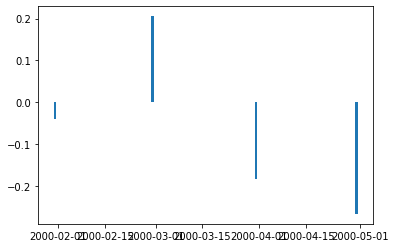

In [72]:
tss = ts.resample('M').mean()
plt.bar(   tss.index  , tss.values  )

In [73]:
#tss = ts.resample('M',kind='period').mean()
#plt.bar(   tss.index  , tss.values  )

,index,0
0,2000-01,-0.038792
1,2000-02,0.205754
2,2000-03,-0.183170
3,2000-04,-0.266852


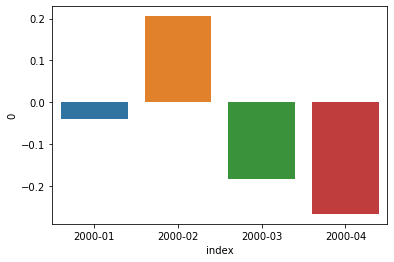

In [74]:
tss = ts.resample('M',kind='period').mean()
rs = tss.reset_index()
display(rs)
sns.barplot(x='index',  y=0 , data = rs)
plt.show()

In [75]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01   -0.121395
2000-02   -0.173030
2000-03   -0.067880
2000-04    0.081070
Freq: M, dtype: float64

In [76]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [77]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [78]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [79]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [80]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [81]:
# как на бирже для построениея свечей
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [82]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.078977,0.534395,0.514143,-0.631577
2000-01-12,-0.312220,-0.558960,-0.761187,0.175556


In [83]:
# заполним пропуски
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.078977,0.534395,0.514143,-0.631577
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.312220,-0.558960,-0.761187,0.175556


In [84]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.078977,0.534395,0.514143,-0.631577
2000-01-06,-0.078977,0.534395,0.514143,-0.631577
2000-01-07,-0.078977,0.534395,0.514143,-0.631577
2000-01-08,-0.078977,0.534395,0.514143,-0.631577
2000-01-09,-0.078977,0.534395,0.514143,-0.631577
2000-01-10,-0.078977,0.534395,0.514143,-0.631577
2000-01-11,-0.078977,0.534395,0.514143,-0.631577
2000-01-12,-0.312220,-0.558960,-0.761187,0.175556


In [85]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.078977,0.534395,0.514143,-0.631577
2000-01-06,-0.078977,0.534395,0.514143,-0.631577
2000-01-07,-0.078977,0.534395,0.514143,-0.631577
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.312220,-0.558960,-0.761187,0.175556


In [86]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.078977,0.534395,0.514143,-0.631577
2000-01-13,-0.312220,-0.558960,-0.761187,0.175556


In [87]:
# настоящая интерполяция
display(df_daily)
df_daily.interpolate(method='linear', axis=0)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.078977,0.534395,0.514143,-0.631577
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.312220,-0.558960,-0.761187,0.175556


,Colorado,Texas,New York,Ohio
2000-01-05,-0.078977,0.534395,0.514143,-0.631577
2000-01-06,-0.112298,0.378201,0.331953,-0.516273
2000-01-07,-0.145618,0.222008,0.149763,-0.400968
2000-01-08,-0.178938,0.065814,-0.032427,-0.285663
2000-01-09,-0.212259,-0.090379,-0.214617,-0.170358
2000-01-10,-0.245579,-0.246573,-0.396807,-0.055053
2000-01-11,-0.278899,-0.402766,-0.578997,0.060251
2000-01-12,-0.312220,-0.558960,-0.761187,0.175556


### 7. Скользящие окна

In [88]:
close_px_all = pd.read_csv('E://stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [89]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


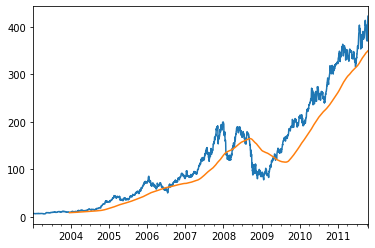

In [90]:
close_px.AAPL.plot();
close_px.AAPL.rolling(250).mean().plot();

In [91]:
close_px.AAPL.rolling(250).mean()[:10]

2003-01-02   NaN
2003-01-03   NaN
2003-01-06   NaN
2003-01-07   NaN
2003-01-08   NaN
2003-01-09   NaN
2003-01-10   NaN
2003-01-13   NaN
2003-01-14   NaN
2003-01-15   NaN
Freq: B, Name: AAPL, dtype: float64

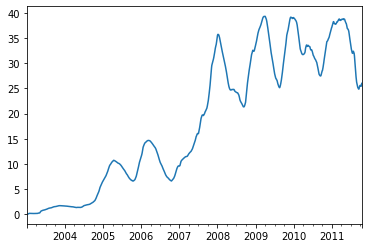

In [92]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot();

In [93]:
appl_std250[:10]

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
Freq: B, Name: AAPL, dtype: float64

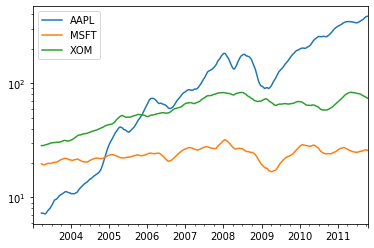

In [94]:
close_px.rolling(60).mean().plot(logy=True);

In [97]:
# 20 ДНЕВНОЕ скользящее среднее
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000


### 8. Скользящие окна с затуханием

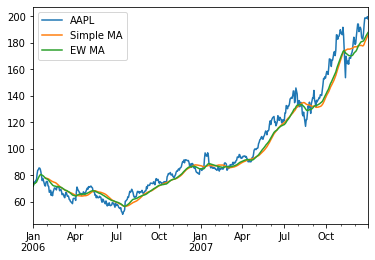

In [96]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean() # придаем больший вес поздним значениям

aapl_px.plot( label='AAPL')
ma60.plot( label='Simple MA');
ewma60.plot( label='EW MA');
plt.legend();